# Abstract
Forecasting temperature  by the use of advance statistical tools is very important 
in understanding and dealing with the effects of rising or decreasing temperatures.
This study uses Time series analysis and predictions, a statistical methods to analyze 
and forecast temperatures, by using the average max, min and mean temperature 
for each month of different regions in the United Kingdom measured by the Met Office. 
The increase in concerns about the effects of rising or decreasing temperature on  humans, 
animals, the climate, oceans, and seasonal patterns provokes the need for accurate models 
for forecasting the temperatures of the different regions across the globe. This report presents
the results of forecasting  temperatures using trend analysis, seasonality estimation through 
seasonal averages and seasonal harmonics, the final model were selected using the autoregressive integrated moving average models


In [59]:
#install.packages(c("magrittr", "knitr", "tseries","forecast"))

In [60]:
library(magrittr)
library(knitr)
library(tseries)
library(forecast)


# 1. DATA COLLECTION
The data used for this study was gotten from the Met Office website where we sourced 
for the average max, min and mean temperature for each month for 10 different districts in the UK.
This gave us 30 different time series to work with, In order to collect the data from this website without
having to download all the individual files or read in the files individually, a function was created,
which takes two arguments; the region(district) and the temperature(parameter), 
For each desired time series data, the function reads in the data, transform it 
using the time series function and outputs a time series data from 1884 to 2020 
at a frequency of 12 observations per year which reperesents each individual monthly 
average in a year. The time series data was saved in a nested lists for each of the 
different parameters which made the it easy to work with the massive count of this data.


In [61]:
#We created a function that takes region and district and imports the data from the Metoffice website.
# Create a list of all regions
districts <- c("Northern_Ireland",

               "Scotland_N",

               "Scotland_E",

               "Scotland_W",

               "England_E_and_NE",

               "England_NW_and_N_Wales",

               "Midlands",

               "East_Anglia",

               "England_SW_and_S_Wales",

               "England_SE_and_Central_S"

)

 
# create a list of all Parameters
features <- c("Tmin", "Tmean", "Tmax")

 
# indicate template of the url
address <-"https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/"

 
# Create a function that reads in files from the website
read.ts <- function(district, feature){

  c(address, feature, "/date/", district, ".txt") %>%

  paste(collapse = "") %>%

  read.table(header = TRUE, skip = 5, nrow = 137) %>%

  subset(select = 2:13) %>%

  t() %>%

  as.vector() %>%

  ts(frequency = 12, end = c(2020, 12))

}


In [62]:
# Function to apply the read.ts function to a list
feature_select <- function(x) {
  lapply(districts, read.ts, feature = x) %>%
    set_names(districts)
}


In [63]:
# Implement the feature_select  function
all_data <- lapply(features, feature_select) %>% set_names(features)
Tmin <- all_data$Tmin
Tmean <- all_data$Tmean
Tmax <- all_data$Tmax


# 2. Minimum and Maximum evaluation
Two functions were developed to identify the district and date (year and month) of the highest and
the lowest max, min and mean temperature. All our time series data are stored in three groups of temperature parameter,
which is a nested list a function was created and we employed the lapply function to apply this function across the 
respective lists within each group of parameters. The output of the implementation of this function shows that for
the average monthly minimum temperature;

* The region with the highest temperature is England_SE_and_Central_S , and the date is Aug , 1997
* The region with the lowest temperature is Scotland_E , and the date is Jan , 1895"

The region with the lowest and highest temperature measurement for the  average monthly maximum temperature is;

* The region with the highest temperature is East_Anglia , and the date is Jul , 2006
* The region with the lowest temperature is Midlands , and the date is Feb , 1947

Finally, the region with the lowest and highest temperature measurement for the  average monthly mean temperature is;

* The region with the highest temperature is East_Anglia , and the date is Jul , 2006
* The region with the lowest temperature is Scotland_E , and the date is Jan , 1895


In [64]:
# Function to return the maximum value in nested list
max_eval <- function(x) {
  names(x)[which.max(unlist(lapply(x, FUN = max)))] -> region
  month.abb[(time(x[[region]])[which.max(x[[region]])] %% 1) * 12 + 1] -> month
  floor(time(x[[region]])[which.max(x[[region]])]) -> year
  paste(
    "The region with the highest temperature for",
    deparse(substitute(x)),
    "is",
    region,
    ",",
    "and the date is",
    month,
    ",",
    year
  )
}


In [65]:
# Function to return the minimum value in nested list
min_eval <- function(x) {
  names(x)[which.min(unlist(lapply(x, FUN = min)))] -> region
  month.abb[(time(x[[region]])[which.min(x[[region]])] %% 1) * 12 + 1] -> month
  floor(time(x[[region]])[which.min(x[[region]])]) -> year
  paste(
    "The region with the lowest temperature for",
    deparse(substitute(x)),
    "is",
    region,
    ",",
    "and the date is",
    month,
    ",",
    year
  )
}


In [66]:
# Call min-max evaluating function
max_eval(Tmin)
min_eval(Tmin)
max_eval(Tmax)
min_eval(Tmax)
max_eval(Tmean)
min_eval(Tmean)


[1] "The region with the highest temperature for Tmin is England_SE_and_Central_S , and the date is Aug , 1997"

[1] "The region with the lowest temperature for Tmin is Scotland_E , and the date is Jan , 1895"

[1] "The region with the highest temperature for Tmax is East_Anglia , and the date is Jul , 2006"

[1] "The region with the lowest temperature for Tmax is Midlands , and the date is Feb , 1947"

[1] "The region with the highest temperature for Tmean is East_Anglia , and the date is Jul , 2006"

[1] "The region with the lowest temperature for Tmean is Scotland_E , and the date is Jan , 1895"

# 3 – Exploratory Data Analysis
We performed some exploratory analysis on the time series data and explores some questions about the time series data as seen below.

### Which district is the coldest/warmest?
We will be estimating the coldest and warmest region using the following criteria. We have the time series data for the mean daily maximum air temperature, the mean daily minimum and the mean of air for the regions. We will find the coldest region by finding the region with the highest/lowest temperature across these three groups of time series data measured. We observed that the output using this criteria varies among the three different groups of time seris. This can be seen in the output below.

* The region with the highest average monthly mean temperature is England_SE_and_Central_S , 
While the region with the lowest temperature is Scotland_N
* The region with the highest average monthly minimum temperature is England_SW_and_S_Wales, 
While the region with the lowest temperature is Scotland_E
* The region with the highest average monthly maximum temperature is England_SE_and_Central_S,
While the region with the lowest temperature is Scotland_N


In [67]:
#creating a function to check average values for any time series parameter given
avg_temp <- function(x) {
  lapply(x, mean) -> tmp_val
  names(tmp_val)[which.max(unlist(lapply(tmp_val, FUN = max)))] -> warmest
  names(tmp_val)[which.min(unlist(lapply(tmp_val, FUN = min)))] -> coldest
  result <-
    paste(
      "The region with the highest temperature average for",
      deparse(substitute(x)),
      "is",
      warmest,
      ", While the region with the lowest temperature is",
      coldest
    )
  return(result)
}


In [68]:
avg_temp(Tmean)
avg_temp(Tmin)
avg_temp(Tmax)


[1] "The region with the highest temperature average for Tmean is England_SE_and_Central_S , While the region with the lowest temperature is Scotland_N"

[1] "The region with the highest temperature average for Tmin is England_SW_and_S_Wales , While the region with the lowest temperature is Scotland_E"

[1] "The region with the highest temperature average for Tmax is England_SE_and_Central_S , While the region with the lowest temperature is Scotland_N"

### Which district has the widest temperature range?
We created a function that takes returns the highest range for a list of  time series data. This was applied to three groups of time series data and we observed that for average monthly mean temperature  and average monthly minimum temperature  East_Anglia and England_SE_and_Central_S had the widest range but for the average monthly maximum temperature we observed that East Anglia had the widest range of temperatures.


In [69]:
widest_range <- function(takes_list) {
  lapply(takes_list, min) %>% as.data.frame() - lapply(takes_list, max) %>% as.data.frame() -> range_diff
  range_diff[which(range_diff %in% apply(range_diff, 1, min))] -> widest_range
  return(widest_range)
}


In [70]:
widest_range(Tmean)
widest_range(Tmin)
widest_range(Tmax)


East_Anglia,England_SE_and_Central_S
-22.9,-22.9


East_Anglia,England_SE_and_Central_S
-20.5,-20.5


East_Anglia
-26.9


### Are winters/summers getting colder/hotter?
We employed data wrangling techniques to group our time series data into two different 
seasons (winter and summer). We created a  function to convert all time series object 
to data frame of each season(winter and summer). Each row in the dataframe represents 
a year and the months for a specific season. This function was applied to the average 
monthly mean temperature, this gives a summary of the occurence for each months in a
particular season. A function was then developed to merge all the seasonal dataframe 
from each region into a single group for a specific season and this was converted to 
a time series object using the function ts(). The new time series data was then visualized 
on a time series plot and we observed that the mean temperature for winter months has an
upward trend while that of summer months has a downward trend, this means winters are 
getting hotter while summers are getting colder.


In [71]:
winter <- c("Dec", "Jan", "Feb", "Year")
summer <- c("Jun", "Jul", "Aug", "Year")

get_season <- function(Tparameter, seas_param) {
  #convert to dataframe
  dmn <- list(month.abb, unique(floor(time(Tparameter))))
  as.data.frame(t(matrix(Tparameter , 12, dimnames = dmn))) -> ts_df
  #add year to dataframe
  ts_df$Year <- seq(1884, 2020)
  #subset data into seasons
  season <- seas_param
  #add to new variable
  ts_df[season] -> season
  return(season)
}


In [72]:
lapply(Tmean, get_season,seas_param=summer)->sum_mons
lapply(Tmean, get_season,seas_param=winter)->win_mons


In [73]:
merge_avg_all <- function(season_mons) {
  my_merge <- function(df1, df2) {
    merge(df1, df2, by = 'Year')
  }
  
  #merge all dataframe inside Parameter list to one
  Reduce(my_merge, season_mons) -> regions_tmp_seas
  
  
  #getting yearly average for all regions
  regions_tmp_seas$testMean <- rowMeans(regions_tmp_seas[, -1])
  
  
  #selecting year and average of all regions
  regions_mean <- regions_tmp_seas[c('Year', 'testMean')]
  
  
  #convert back to TS
  regions_mean  %>% subset(select = 2) %>% t() %>% as.vector() %>% ts(frequency = 1, end = c(2020, 1)) -> final_Temp
  
  return(final_Temp)
  
  
}


Warning message in merge.data.frame(df1, df2, by = "Year"):
“column names ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’ are duplicated in the result”Warning message in merge.data.frame(df1, df2, by = "Year"):
“column names ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’ are duplicated in the result”Warning message in merge.data.frame(df1, df2, by = "Year"):
“column names ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’, ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’ are duplicated in the result”Warning message in merge.data.frame(df1, df2, by = "Year"):
“column names ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’, ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’ are duplicated in the result”Warning message in merge.data.frame(df1, df2, by = "Year"):
“column names ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’, ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’, ‘Dec.x’, ‘Jan.x’, ‘Feb.x’, ‘Dec.y’, ‘Jan.y’, ‘Feb.y’ are duplicated in the result”Warn

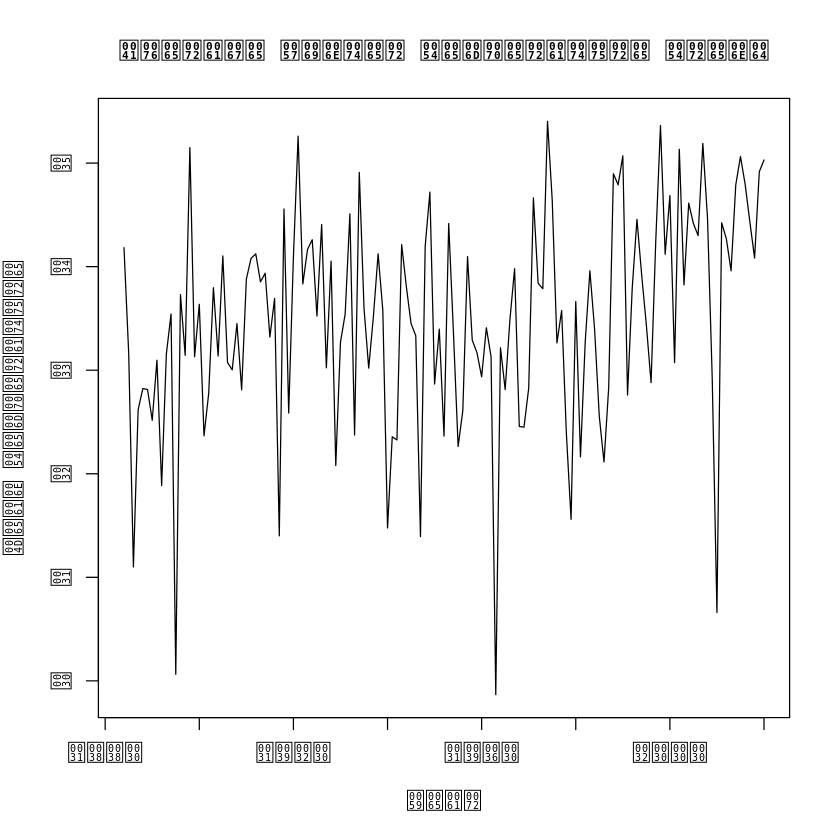

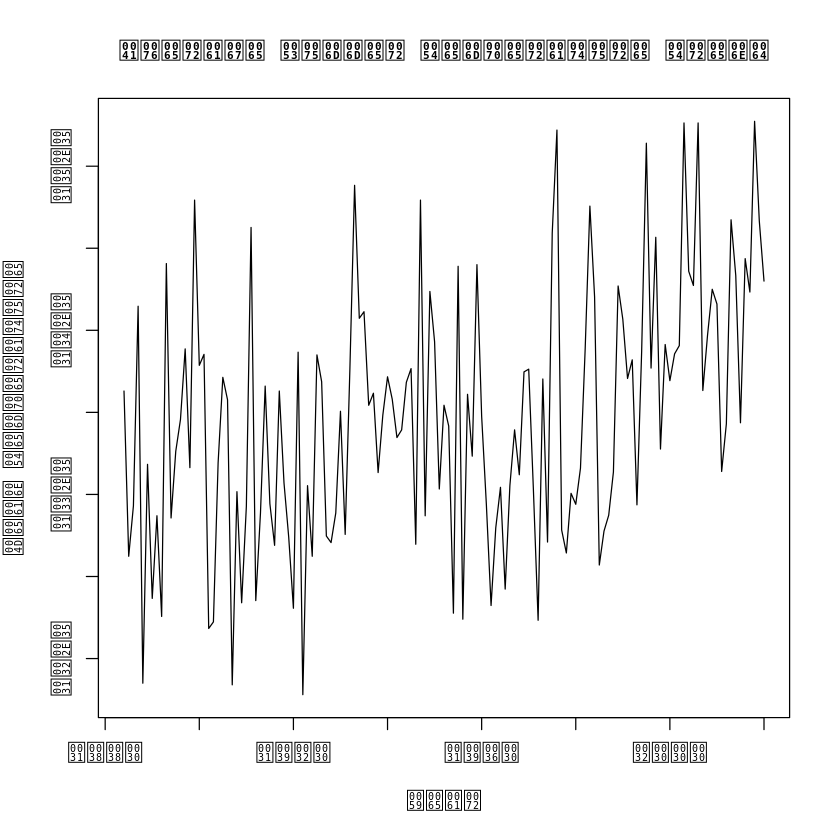

In [74]:
plot(merge_avg_all(win_mons),main="Average Winter Temperature Trend",xlab="Year",ylab="Mean Temperature")
plot(merge_avg_all(sum_mons),main="Average Summer Temperature Trend",xlab="Year",ylab="Mean Temperature")


### 4 – Trend and Seasonality Estimation

We created a function to subset the time series data For each district, and considering
the 3 time series: max temp, min temp and mean temp, from 1884  until December 2019.
This was implemented using the ts() function which takes start of the series, frequency 
of the series, and end of the series. We created a function that subsets our time series
from 1884 - 2019  called "subset_2019" which was then applied to the entire 30 time series 
data set. The Lapply function is one used to apply a function to every element in 
a list, since our 3 groups of time series are stored as a nested list the lapply function was used to
apply our subset_2019 function on the 3 different groups of our time series data Tmin, Tmax, Tmean
to subset the 30 time series data from 1884-2019. We manually created a time vector for our time
series "time.all" which will be used extensively in this analysis.


In [75]:
#function to Subset each of the 30 time series until December 2019
subset_2019 <- function(x) {
  x %>% head(-12)
}


In [76]:
#subset all groups of time series data to december 2019 using subset_2019 function
lapply(Tmin, subset_2019) -> Tmin_2019
lapply(Tmean, subset_2019) -> Tmean_2019
lapply(Tmax, subset_2019) -> Tmax_2019


In [77]:
# manually create time range
time.all <- seq(
  from = start(Tmax_2019$Northern_Ireland)[1],
  by = 1 / frequency(Tmax_2019$Northern_Ireland),
  length.out = length(Tmax_2019$Northern_Ireland)
)


Compare your results and use appropriate plots and/or tables to confirm your
observations.

### 4.1 Estimating trend 
We estimated the trend of each time series using linear, quadratic and cubic regression. A function was developed to apply the 3 different order of polynomial models(linear, quadratic and cubic). The function "run_model" takes a time series data and its time vector and returns its linear, quadratic and cubic models. A function "plot_model" was created which returns a plot of the  time series data, linear, quadratic and cubic models all together on a single plot. Finally, We created a function "model_design" which returns the Akaike criterion (AIC) for each model that was passed into its arguments.We are working with data nested into a list and as such we will create a function that can apply the model_design function to a list of time series, this new function was called "apply_model_design". This function "apply_model_design" will return a list of AIC values for the linear, quadratic and cubic models. We then used the apply_model_design on the three groups of time series data we have. The application of this function gives us the AIC value of each region for the different parameters(TMIN,TMEAN and TMAX).


In [78]:
#Function to return models
run_model <- function(data, time) {
  l_model <- lm(data ~ poly(time, degree = 1, raw = TRUE))
  q_model <- lm(data ~ poly(time, degree = 2, raw = TRUE))
  c_model <- lm(data ~ poly(time, degree = 3, raw = TRUE))
  
  return(list(
    l_model = l_model,
    q_model = q_model,
    c_model = c_model
  ))
}


In [79]:
#Function to return a plot
plot_model <- function(data, time,main) {
  l_var_name <- lm(data ~ poly(time, degree = 1, raw = TRUE))
  q_var_name <- lm(data ~ poly(time, degree = 2, raw = TRUE))
  c_var_name <- lm(data ~ poly(time, degree = 3, raw = TRUE))
  
  
  xlab <- "Year"
  ylab <- "Temperature"
  
  
  

  plot(
    data,
    main = main,
    ylab = ylab,
    xlab = xlab,
    xlim = c(1880, 2025),
    lwd = 1,
    type = "l"
  )
  lines(
    time,
    fitted(l_var_name),
    lwd = 5,
    col = 'red',
    lty = "dotdash"
  )
  lines(
    time,
    fitted(q_var_name),
    lwd = 5,
    col = 'green',
    lty = "dotdash"
  )
  lines(
    time,
    fitted(c_var_name),
    lwd = 5,
    col = 'yellow',
    lty = "dotdash"
  )
}


In [80]:
#Function to return a list of AIC of different models used for each group of time series
model_design <- function(data, time, var_name, poly_degree) {
  var_name <- lm(data ~ poly(time, degree = poly_degree, raw = TRUE))
  Var_AIC <- AIC(var_name)
  
  main <- "Average Temperature from 1879"
  xlab <- "Year"
  ylab <- "Temp"
  
  
  
  
  
  return(list(Var_AIC = Var_AIC))
}


In [81]:
#Function that applies the model_design function to a list and returns list of list
apply_model_design <- function(my_list) {
  lapply(
    my_list,
    model_design,
    var_name = 'linear',
    poly_degree = 1,
    time = time.all
  ) -> linear.models
  lapply(
    my_list,
    model_design,
    var_name = 'quadratic',
    poly_degree = 2,
    time = time.all
  )  -> quadratic.models
  lapply(
    my_list,
    model_design,
    var_name = 'cubic',
    poly_degree = 3,
    time = time.all
  ) -> cubic.models
  
  all_list <-
    list(
      linear.models = linear.models,
      quadratic.models = quadratic.models,
      cubic.models = cubic.models
    )
  
  return(all_list)
  
}


In [82]:
#apply the apply_model_design function on different groups of Time series
apply_model_design(Tmin_2019)-> Tmin_models
apply_model_design(Tmax_2019)-> Tmax_models
apply_model_design(Tmean_2019)-> Tmean_models


Select a trend model for each time series using an appropriate criteria. Are the models
selected all the same? If not is there a pattern depending on the region and/or the
group (max, min and mean)?


### 4.2 Trend Selection
We created a function "which_model" which helps select the best model for a time series, we have the linear, quadratic and cubic AIC values for each region, we will use this function to find the model with the least Akaike criterion(AIC) values which signifies the best model for the time series data. The which_model() function when applied to a list of different time series data returns a dataframe which has a column "Best.Model" which shows the row-wise minimum for each region since each row represents a region and its linear, quadratic and cubic models for a specific parameter. It was observed that all the regions had their best model as the linear model except for two regions(England_E_and_NE and East_Anglia) in the average monthly maximum temperature (Tmax) parameter. The table for best models for each region for a specific parameter can be found below.


In [83]:
# Function to return the best model
which_model <- function(Model_parameter) {
  Model_parameter$linear.models %>% as.data.frame() -> l
  names(l) <- c(names(Model_parameter$linear.models))
  
  Model_parameter$quadratic.models %>% as.data.frame() -> q
  names(q) <- c(names(Model_parameter$quadratic.models))
  
  Model_parameter$cubic.models %>% as.data.frame() -> c
  names(c) <- c(names(Model_parameter$cubic.models))
  
  ModelAIC <- c("Linear", "Quadratic", "Cubic")
  
  cbind(ModelAIC, rbind(l, q, c)) -> tminbind
  
  tminbind %>% as.vector() %>% t() %>% as.data.frame() -> new
  
  names(new) <- as.matrix(new[1,])
  new <- new[-1,]
  new[] <- lapply(new, function(x)
    type.convert(as.character(x)))
  
  new$Best.Model <- colnames(new)[apply(new, 1, FUN = which.min)]
  return(new)
}



###### Best Model by region for Average monthly minimum temperature 


In [84]:
which_model(Tmin_models) 



,Linear,Quadratic,Cubic,Best.Model
Northern_Ireland,8750.087,8751.713,8753.274,Linear
Scotland_N,8810.026,8811.996,8810.161,Linear
Scotland_E,8965.673,8967.253,8968.291,Linear
Scotland_W,8846.061,8846.819,8847.798,Linear
England_E_and_NE,9087.359,9088.741,9088.965,Linear
England_NW_and_N_Wales,9036.052,9037.944,9037.740,Linear
Midlands,9155.343,9156.756,9157.614,Linear
East_Anglia,9285.600,9287.398,9287.210,Linear
England_SW_and_S_Wales,8960.401,8962.169,8960.601,Linear
England_SE_and_Central_S,9221.155,9222.648,9223.064,Linear



###### Best Model by region for Average monthly mean temperature 


In [85]:
which_model(Tmean_models)



,Linear,Quadratic,Cubic,Best.Model
Northern_Ireland,9053.483,9054.372,9055.868,Linear
Scotland_N,9062.529,9064.295,9063.763,Linear
Scotland_E,9366.860,9368.120,9369.033,Linear
Scotland_W,9174.985,9176.598,9176.479,Linear
England_E_and_NE,9567.980,9569.231,9568.649,Linear
England_NW_and_N_Wales,9402.510,9404.186,9403.742,Linear
Midlands,9673.228,9673.928,9674.296,Linear
East_Anglia,9827.049,9828.216,9827.594,Linear
England_SW_and_S_Wales,9346.467,9347.589,9347.012,Linear
England_SE_and_Central_S,9727.621,9728.571,9728.571,Linear


###### Best Model by region for Average monthly maximum temperature 


In [86]:
which_model(Tmax_models)



,Linear,Quadratic,Cubic,Best.Model
Northern_Ireland,9401.193,9401.260,9402.651,Linear
Scotland_N,9365.285,9366.435,9367.163,Linear
Scotland_E,9785.950,9786.641,9787.584,Linear
Scotland_W,9559.447,9561.343,9560.563,Linear
England_E_and_NE,10024.990,10026.200,10024.660,Cubic
England_NW_and_N_Wales,9794.951,9796.380,9796.016,Linear
Midlands,10170.880,10170.950,10170.920,Linear
East_Anglia,10329.940,10330.470,10329.730,Cubic
England_SW_and_S_Wales,9741.100,9741.309,9741.594,Linear
England_SE_and_Central_S,10203.640,10204.130,10203.800,Linear


As stated above we observed that all our model choice for all regions are uniform except England_E_and_NE and East_Anglia for the Tmax parameter, it would be interesting to see a plot of the linear model vs plot of the cubic model. We used the function "plot_model" created above to implement these plots and we observe that there is a difference in the plots for the different regions, while Northern Ireland has a more stable trend, we can see that England_E_and_NE and East_Anglia do have some cubic trend.



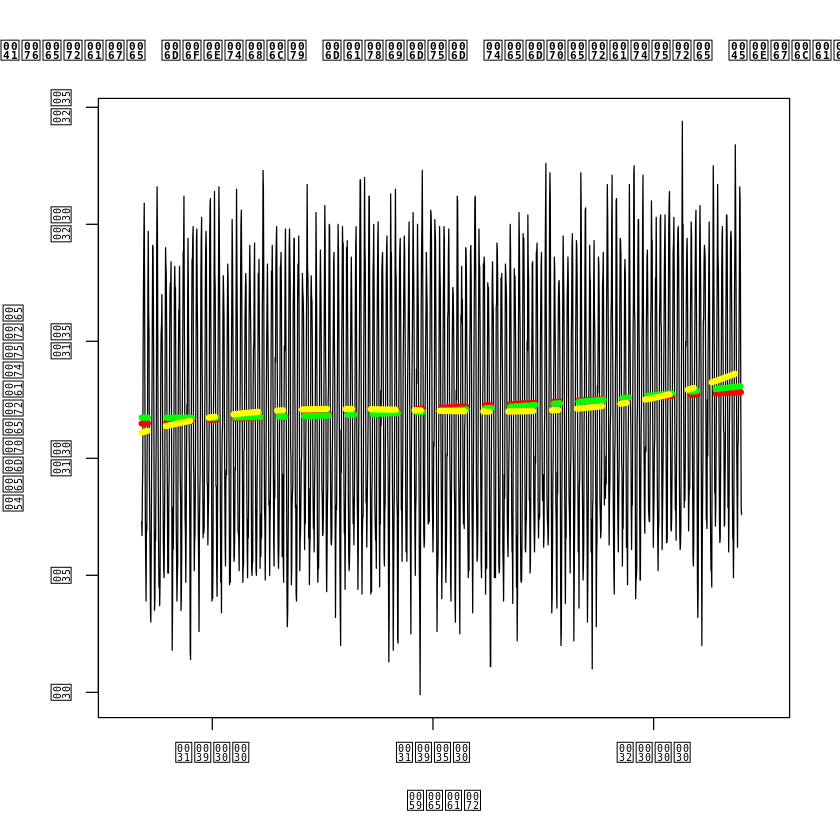

In [87]:
plot_model(Tmax_2019$England_E_and_NE,time.all,"Trend of Average monthly maximum temperature England_E_and_NE")



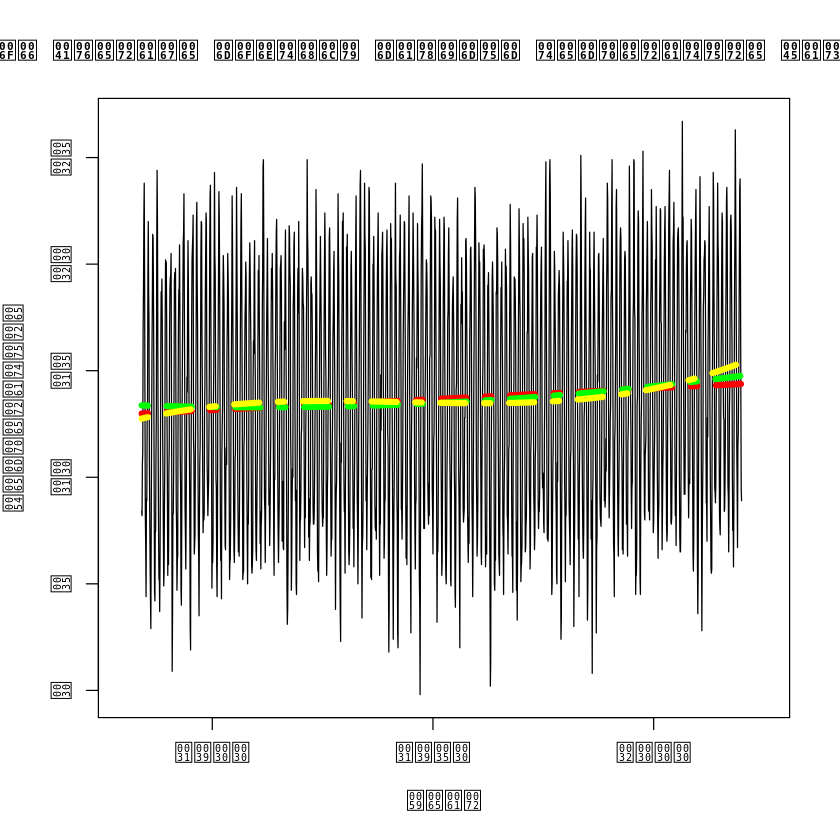

In [88]:
plot_model(Tmax_2019$East_Anglia,time.all,"Trend of Average monthly maximum temperature East_Anglia")



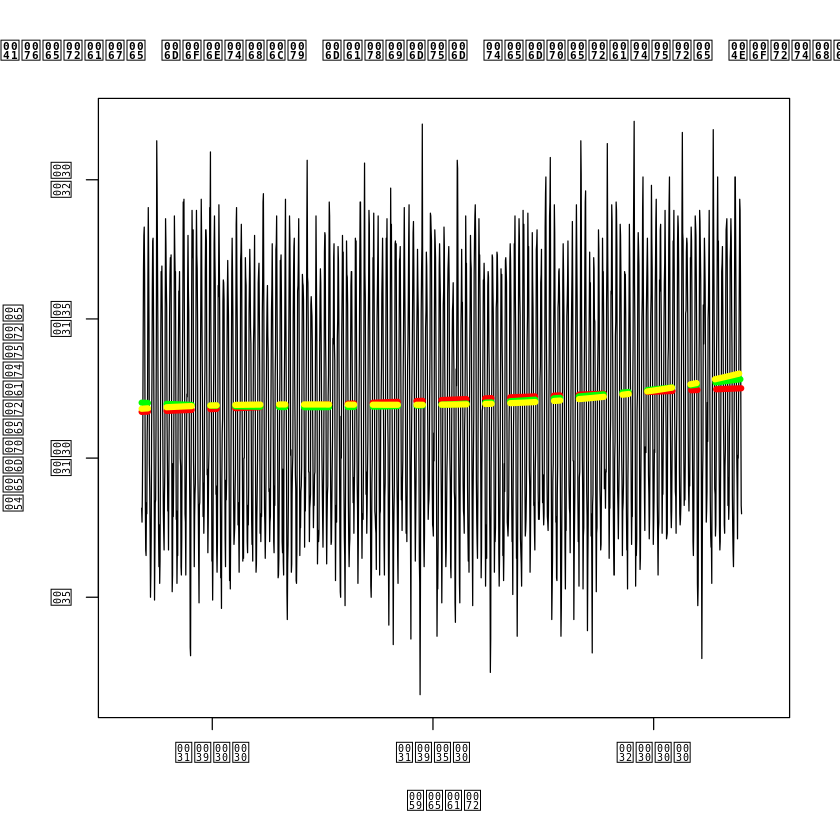

In [89]:
plot_model(Tmax_2019$Northern_Ireland,time.all,"Trend of Average monthly maximum temperature Northern_Ireland")



### 4.3 Estimating seasonality using seasonal means and harmonic models

###### 4.3.1 removing Trend using averaging
We will create a function that removes the trend component and returns its monthly average. The function takes two arguments which are the time series data and the polynomial model that bests fit it according to the Akaike Criterion. All models except  England_E_and_NE and East_Anglia for the Tmax parameter have a linear model as their best model. We will split the Tmax time series data into two groups the linear and the cubic groups, this would make it easier to apply functions which are specific to the best model for each region. We will then use the return_month_avg to return the seasonal means of each of the different regions based on their best trend model.


In [90]:
return_month_avg <- function(takes_data, model_type) {
  run_model(takes_data, time.all) -> model.result
  
  data.notrend <- takes_data - fitted(model.result[[model_type]])
  
  tapply(data.notrend, cycle(takes_data), mean)  %>% as.data.frame() -> fin_month_avg
  colnames(fin_month_avg) <- c('Season_Mean')
  mymonths <- c("Jan",
                "Feb",
                "Mar",
                "Apr",
                "May",
                "Jun",
                "Jul",
                "Aug",
                "Sep",
                "Oct",
                "Nov",
                "Dec")
  #add abbreviated month name
  fin_month_avg$Month <- mymonths
  return(fin_month_avg)
  
  
}


In [91]:
# Subsetting cubic and linear model for TMAX
Tmax_2019[-c(5,8)] -> Tmax_2019_ln

Tmax_2019[c(5,8)]-> Tmax_2019_cubic


In [92]:
#----Estimate seasonal average for All linear model
lapply(Tmin_2019, return_month_avg, model_type = "l_model") %>% set_names(names(Tmin_2019)) -> Tmin_monthly_avg
lapply(Tmean_2019, return_month_avg, model_type = "l_model") %>% set_names(names(Tmin_2019)) -> Tmean_monthly_avg
lapply(Tmax_2019_ln, return_month_avg, model_type = "l_model") %>% set_names(names(Tmax_2019_ln)) -> Tmax_monthly_avg_ln

#----Estimate seasonal average for All cubic model
lapply(Tmax_2019_cubic, return_month_avg, model_type = "c_model") %>% set_names(names(Tmax_2019_cubic)) -> Tmean_monthly_avg_cubic



###### Sample monthly average for Northern Ireland


In [93]:
Tmin_monthly_avg$Northern_Ireland



Season_Mean,Month
-3.8808442,Jan
-4.0071769,Feb
-3.2077743,Mar
-1.8319011,Apr
0.5866191,May
3.3823453,Jun
5.1493949,Jul
4.9635034,Aug
3.2577590,Sep
0.7674557,Oct


###### 4.3.2 Estimate seasonality with seasonal average
The seasonality was estimated using the seasonal means method. We created a function return_seas_avg which takes the time series data and model type. The function models the inputs and returns the seasonal means for each of the time series provided to it. We used lapply to apply the return_seas_avg to the list of time series for the different parameters Tmin, Tmax, Tmean.


In [94]:
return_seas_avg <- function(data, model_type) {
  #one region since all months are the same
  months <- as.factor(cycle(Tmin_2019$Northern_Ireland))
  # Apply the run_model function to the data to get the specified model
  run_model(data, time.all) -> model.result
  # Get the residuals from the data which does not have the trend
  data.notrend <- data - fitted(model.result[[model_type]])
  seas.means <- lm(data.notrend ~ months - 1)
  
  
  
  return(seas.means)
}


In [95]:
lapply(Tmin_2019, return_seas_avg, model_type = "l_model") %>% set_names(names(Tmin_2019)) -> Tmin_seas_est
lapply(Tmean_2019, return_seas_avg, model_type = "l_model") %>% set_names(names(Tmin_2019)) -> Tmean_seas_est
lapply(Tmax_2019_ln, return_seas_avg, model_type = "l_model") %>% set_names(names(Tmax_2019_ln)) -> Tmax_seas_est_ln

#All cubic model
lapply(Tmax_2019_cubic, return_seas_avg, model_type = "c_model") %>% set_names(names(Tmax_2019_cubic)) -> Tmax_seas_est_cubic
#joined max
do.call(c, list(Tmax_seas_est_ln, Tmax_seas_est_cubic)) -> Tmax_ln_nd_cub_seas


In [96]:
# seasonal means validation check
length(names(Tmin_seas_est))
length(names(Tmean_seas_est))
length(names(Tmax_ln_nd_cub_seas))


[1] 10

[1] 10

[1] 10

#### 4.3.2 Estimating seasonality using harmonic mean
We created a function to give the harmonic mean of a time series data. We performed a trend check on the time series and remove the specified trend type(l_model,c_model and q_model). The residuals were derived by subtracting the data from the fitted data. In our dataset since all our best models are linear except for England_E_and_NE and East_Anglia for the average monthly maximum temperature, this means all our models will be linear except  these two which will be cubic. In this step we applied the return_harmonic function to all our time series data, a check will be done for models that are significant at a p-value of 0.05.


In [97]:
# Function to return the harmonic mean of a time series data
return_harmonic <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  # Function to return harmonic of specified order
  seasonal.har <- function(order) {
    assign(paste(c("seasonal.har", order), collapse = ""),
           lm(data.notrend ~ . - 1,
              data.frame(SIN = SIN[, 1:order], COS = COS[, 1:order])))
    
    
    return(get(paste(c(
      "seasonal.har", order
    ), collapse = "")))
    
  }
  
  
  
  # order 1
  seas.har1 <- seasonal.har(1)
  
  # order 2
  seas.har2 <- seasonal.har(2)
  
  # order 3
  seas.har3 <- seasonal.har(3) # SIN.3 not significant
  
  # order 4
  seas.har4 <- seasonal.har(4) # SIN.3 COS.4 not significant
  
  
  # order 5
  seas.har5 <-
    seasonal.har(5) # SIN.3 SIN5 COS.4 COS.5 not significant
  
  
  
  # order 6
  seas.har6 <-
    seasonal.har(6) # SIN.3 SIN5 SIN.6 COS.4 COS.5 COS.6 not significant
  
  
  return(
    list(
      seas.har1 = seas.har1,
      seas.har2 = seas.har2,
      seas.har3 = seas.har3,
      seas.har4 = seas.har4,
      seas.har5 = seas.har5,
      seas.har6 = seas.har6
    )
  )
}


In [98]:
# Apply the return_harmonic function to all time series
lapply(Tmin_2019, return_harmonic, trend_type = "l_model") %>% set_names(names(Tmin_2019)) -> Tmin_harmonic
lapply(Tmean_2019, return_harmonic, trend_type = "l_model") %>% set_names(names(Tmean_2019)) -> Tmean_harmonic
lapply(Tmax_2019_ln, return_harmonic, trend_type = "l_model") %>% set_names(names(Tmax_2019_ln)) -> Tmax_harmonic_ln
#remove the cubic trend from England_E_and_NE and East_Anglia for the Tmax parameter
lapply(Tmax_2019_cubic, return_harmonic, trend_type = "c_model") %>% set_names(names(Tmax_2019_cubic)) -> Tmax_harmonic_cubic


##### significant models
We created a function to return the significant models for a specific region and harmonic. We need models with a p-value lower than that of the null hypothesis. We create region_harmonics() function to take a list and apply all the function singular_harmonic using lapply() to all the elements in the list provided in the argument. We developed a function grouped_harmonica() that applies the region_harmonics function to a nested list. This would return only the models that has passed the null hypothesis test, hence containing only significant models.

The Null hypothesis and alternative hypothesis are as follows:

* Null hypothesis: The model is not significant 
* Alternative hypothesis: The model is  significant 


In [99]:
# p-value lesser than 0.05 shows significant that null is false
singular_harmonic <- function(x) {
  summary(x) -> temp
  temp$coefficients %>% as.data.frame() -> temp2
  temp2 <- temp2[temp2$`Pr(>|t|)` < 0.05,]
  temp2$Harmonic.Model <- row.names(temp2)
  #return(temp2)
  
  
}


In [100]:
region_harmonics <- function(takes_list) {
  lapply(takes_list, singular_harmonic) %>%  set_names(names(takes_list)) -> significant_mods
  return(significant_mods)
}


In [101]:
grouped_harmonica <- function(x) {
  lapply(x, region_harmonics) %>% set_names(names(x)) -> Tmin_best_harmonics
  return(Tmin_best_harmonics)
}

grouped_harmonica(Tmin_harmonic) -> Tmin_indexed_harmonics
grouped_harmonica(Tmean_harmonic) -> Tmean_indexed_harmonics
grouped_harmonica(Tmax_harmonic_ln) -> Tmax.ln_indexed_harmonics
grouped_harmonica(Tmax_harmonic_cubic) -> Tmax.cub_indexed_harmonics


#### Unique models across all time series
We created a function that checks the unique models for each element in a list. This unique model would be used to then recreate the harmonic models. We retrieved the best harmonic for each region i.e all harmonics with P-value lesser than the null hypothesis p-value of 0.05. We applied the unique function to all our best model to retrieve only unique models. We observed 5 different unique configurations for our models, this would be used to create 5 different functions, each function will be specific to the unique model configurations found in the implementation below.


In [102]:
best_harm <- function(takes_list) {
  lapply(takes_list, unique) %>% set_names(names(takes_list)) -> significant_harmonics
  return(significant_harmonics)
}


In [103]:
Tmin_best_harmonics <- best_harm(Tmin_indexed_harmonics)
Tmean_best_harmonics <- best_harm(Tmean_indexed_harmonics)
Tmax.ln_best_harmonics <- best_harm(Tmax.ln_indexed_harmonics)
Tmax.cub_best_harmonics <- best_harm(Tmax.cub_indexed_harmonics)


In [104]:
#unique(Tmin_best_harmonics)
best_model_list <-
  c(
    Tmin_best_harmonics,
    Tmean_best_harmonics,
    Tmax.ln_best_harmonics,
    Tmax.cub_best_harmonics
  )
lapply(best_model_list, unique) %>%  set_names(names(best_model_list)) -> all_unique_best


In [105]:
length(unique(all_unique_best) )



[1] 5

In [106]:
# View unique model config
unique(all_unique_best)


[[1]]
[[1]][[1]]
[1] "SIN" "COS"

[[1]][[2]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2"


[[2]]
[[2]][[1]]
[1] "SIN" "COS"

[[2]][[2]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2"

[[2]][[3]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2" "COS.4"


[[3]]
[[3]][[1]]
[1] "SIN" "COS"

[[3]][[2]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2"

[[3]][[3]]
[1] "SIN.1" "SIN.2" "SIN.5" "COS.1" "COS.2"


[[4]]
[[4]][[1]]
[1] "SIN" "COS"

[[4]][[2]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2"

[[4]][[3]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2" "COS.3"


[[5]]
[[5]][[1]]
[1] "SIN" "COS"

[[5]][[2]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2"

[[5]][[3]]
[1] "SIN.1" "SIN.2" "COS.1" "COS.2" "COS.3"

[[5]][[4]]
[1] "SIN.1" "SIN.2" "SIN.4" "COS.1" "COS.2" "COS.3"

###### create functions to map models
Five different functions were developed inline with the 5 different significant harmonic models we had during the null hypothesis test. The functions are:

* rerun_harmonic1 - ["SIN" "COS" ] and ["SIN.1" "SIN.2" "COS.1" "COS.2"]

******
* rerun_harmonic2 - ["SIN" "COS"], ["SIN.1" "SIN.2" "COS.1" "COS.2"] and 
["SIN.1" "SIN.2" "COS.1" "COS.2" "COS.4"]

******
* rerun_harmonic3 - ["SIN" "COS"], ["SIN.1" "SIN.2" "COS.1" "COS.2"] and 
["SIN.1" "SIN.2" "SIN.5" "COS.1" "COS.2"]

******
* rerun_harmonic4 - ["SIN" "COS"], ["SIN.1" "SIN.2" "COS.1" "COS.2"] and 
["SIN.1" "SIN.2" "COS.1" "COS.2" "COS.3"]

******

* rerun_harmonic5 - ["SIN" "COS"], ["SIN.1" "SIN.2" "COS.1" "COS.2"], 
["SIN.1" "SIN.2" "COS.1" "COS.2" "COS.3"] and ["SIN.1" "SIN.2" "SIN.4" "COS.1" "COS.2" "COS.3"]

We observe that all significant models include the first and second harmonics with little variations among the other models. The functions takes the time series data and the best trend model for it l_model, q_model or c_model and returns the harmonic with the lowest Akaike criterion among all the harmonic models implemented within the specific function. Implementing this function gives us the best harmonic model for each of the 30 time series data we are working with.


In [107]:
# Function "SIN.1" "SIN.2" "COS.1" "COS.2" and  "SIN" "COS"
rerun_harmonic1 <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har1 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, 1:1], COS = COS[, 1:1]))
  
  
  seas.har2 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2)]))
  
  
  
  
  list(seas.har1 = seas.har1, seas.har2 = seas.har2) -> myl
  
  lapply(myl, AIC)  -> mlk
  
  
  names(mlk)[which.min(unlist(lapply(mlk, FUN = min)))] -> res
  
  return(mlk)
  
  
}


In [108]:
rerun_harmonic2 <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har1 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, 1:1], COS = COS[, 1:1]))
  
  
  seas.har2 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2)]))
  
  
  seas.har3_B <-  lm(data.notrend ~ . - 1,
                     data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2, 4)]))
  
  
  
  list(seas.har1 = seas.har1,
       seas.har2 = seas.har2,
       seas.har3_B = seas.har3_B) -> myl
  
  lapply(myl, AIC)  -> mlk
  
  
  names(mlk)[which.min(unlist(lapply(mlk, FUN = min)))] -> res
  
  return(mlk)
  
  
}


In [109]:
rerun_harmonic3 <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har1 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, 1:1], COS = COS[, 1:1]))
  
  
  seas.har2 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2)]))
  
  
  seas.har3_C <-  lm(data.notrend ~ . - 1,
                     data.frame(SIN = SIN[, c(1, 2, 5)], COS = COS[, c(1, 2)]))
  
  
  list(seas.har1 = seas.har1,
       seas.har2 = seas.har2,
       seas.har3_C = seas.har3_C) -> myl
  
  lapply(myl, AIC)  -> mlk
  
  
  names(mlk)[which.min(unlist(lapply(mlk, FUN = min)))] -> res
  
  return(mlk)
  
}


In [110]:
rerun_harmonic4 <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har1 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, 1:1], COS = COS[, 1:1]))
  
  
  seas.har2 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2)]))
  
  
  seas.har3_A <-  lm(data.notrend ~ . - 1,
                     data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2, 3)]))
  
  
  list(seas.har1 = seas.har1,
       seas.har2 = seas.har2,
       seas.har3_A = seas.har3_A) -> myl
  
  lapply(myl, AIC)  -> mlk
  
  
  names(mlk)[which.min(unlist(lapply(mlk, FUN = min)))] -> res
  
  return(mlk)
  
}


In [111]:
rerun_harmonic5 <- function(takes_data, trend_type) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result[[trend_type]])
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har1 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, 1:1], COS = COS[, 1:1]))
  
  
  seas.har2 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2)]))
  
  
  seas.har3 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2)], COS = COS[, c(1, 2, 3)]))
  
  seas.har4 <-  lm(data.notrend ~ . - 1,
                   data.frame(SIN = SIN[, c(1, 2, 4)], COS = COS[, c(1, 2, 3)]))
  
  
  
  list(
    seas.har1 = seas.har1,
    seas.har2 = seas.har2,
    seas.har3 = seas.har3,
    seas.har4 = seas.har4
  ) -> myl
  
  lapply(myl, AIC)  -> mlk
  
  
  which.min(unlist(lapply(mlk, FUN = min))) -> res
  
  return(mlk)
  
  
  
}


##### Subset all the time series into groups of significant harmonic model
We have 5 different configurations of significant harmonnic models, we will group each of our time series parameter (Tmin,Tmean and Tmax) to the significant harmonic model group they belong to among these 5 configurations after which their respective function is then applied on each subset. Based on initial analysis we observed that for our average monthly maximum temperature we have two regions with a cubic trend model as their best trend model, we will create a different subset for this group to make the implementation of these functions on the time series data seamless.


In [112]:
#Subset  Tmin_best_harmonics into significant harmonic groups
Tmin_best_dual <-
  Tmin_2019[-c(3, 9)] #function rerun_harmonic1 would work for this
lapply(Tmin_best_dual, rerun_harmonic1, trend_type = "l_model") %>% set_names(names(Tmin_best_dual)) -> significant_Tmin_dual
############################################################################################

Tmin_best_trio1 <-
  Tmin_2019[c(3)] # function rerun_harmonic2 would work for this
lapply(Tmin_best_trio1, rerun_harmonic2, trend_type = "l_model") %>% set_names(names(Tmin_best_trio1)) -> significant_Tmin_trio1
############################################################################################

Tmin_best_trio2 <-
  Tmin_2019[c(9)] # rerun_harmonic3 would work on this
lapply(Tmin_best_trio2, rerun_harmonic3, trend_type = "l_model") %>% set_names(names(Tmin_best_trio2)) -> significant_Tmin_trio2
############################################################################################


In [113]:
# Subset  Tmean_best_harmonics into significant harmonic groups
Tmean_best_dual <-
  Tmean_2019[-c(4, 10)] #rerun_harmonic1 will work for this
lapply(Tmean_best_dual, rerun_harmonic1, trend_type = "l_model") %>% set_names(names(Tmean_best_dual)) -> significant_Tmean_dual
############################################################################################


Tmean_best_trio1 <-
  Tmean_2019[c(4)] # rerun_harmonic4 will work for this
lapply(Tmean_best_trio1, rerun_harmonic4, trend_type = "l_model") %>% set_names(names(Tmean_best_trio1)) -> significant_Tmean_trio1
############################################################################################

Tmean_best_trio2 <-
  Tmean_2019[c(10)] #rerun_harmonic3 this function works for this
lapply(Tmean_best_trio2, rerun_harmonic1, trend_type = "l_model") %>% set_names(names(Tmean_best_trio2)) -> significant_Tmean_trio2
############################################################################################


In [114]:
#Subset  Tmax.ln_best_harmonics into significant harmonic groups
Tmax.ln_best_dual <-
  Tmax_2019_ln[c(6, 8)] #rerun_harmonic1 will work for this
lapply(Tmax.ln_best_dual, rerun_harmonic1, trend_type = "l_model") %>% set_names(names(Tmax.ln_best_dual)) -> significant_Tmax.ln_dual
############################################################################################

Tmax.ln_best_trio1 <-
  Tmax_2019_ln[-c(6, 7, 8)] # rerun_harmonic4 this will work for this
lapply(Tmax.ln_best_trio1, rerun_harmonic4, trend_type = "l_model") %>% set_names(names(Tmax.ln_best_trio1)) -> significant_Tmax.ln_trio1
############################################################################################

Tmax.ln_best_trio2 <-
  Tmax_2019_ln[c(7)] # rerun_harmonic5 should work for this
lapply(Tmax.ln_best_trio2, rerun_harmonic5, trend_type = "l_model") %>% set_names(names(Tmax.ln_best_trio2)) -> significant_Tmax.ln_trio2
############################################################################################


In [115]:
#Subset Tmax.cub_best_harmonics harmonic into significant harmonic groups
#Tmax.cub_best_harmonics[c(1,2)]
Tmax.cubic_best_dual <-
  Tmax_2019_cubic[c(1, 2)] #rerun_harmonic1 this functipn will work for this
lapply(Tmax.cubic_best_dual, rerun_harmonic1, trend_type = "c_model") %>% set_names(names(Tmax.cubic_best_dual)) -> significant_Tmax.cub_trio2
############################################################################################


# 4.4 Seasonal model selection Seasonal average or harmonic models?
• Select a seasonal model for each time series using an appropriate criteria. Are the
models selected all the same? If not is there a pattern depending on the region and/or
the group (max, min and mean)?
We now have the different significant harmonic models and the seasonal means of all our time series, we will use the Akaike Criterion to determine the best model for each time series data, as stated above the model with the least AIC will be the best model for the specific time series data.


##### create a function that selects best model for all different parameters
We created a function get_min_AIC that takes 3 arguments the district/region, the best harmonic model, and the seasonal average and returns the model with the lowest Akaike criterion. In this function we combine the AIC of the seasonal average model of the time series and the AIC of the harmonic model and then return the model with the lowest AIC.


In [116]:
get_min_AIC <- function(x, y, z) {
  AIC(z[[x]]) -> seas.avg
  y [[x]]  -> temp1
  temp1 <- c(temp1, seas.avg = seas.avg)
  
  names(temp1)[which.min(unlist(lapply(temp1, FUN = min)))] -> res
  
  
  return(res)
}


##### ALl TMIN
We used the do.call function to re-combine our different configurations for TMIN parameter into one list for each parameter. The get_min_AIC method was then applied on each time series to return the model with the lowest AIC and we observe that seasonal average was not the best for any of the time series in this group.


In [117]:
do.call(c,
        list(
          significant_Tmin_dual,
          significant_Tmin_trio1,
          significant_Tmin_trio2
        )) -> Tmin_harm_final
lapply(districts, get_min_AIC, y = Tmin_harm_final, z = Tmin_seas_est) %>% set_names(districts) -> best_model_TMIN
best_model_TMIN %>% as.data.frame() %>%  t() %>%  as.data.frame() ->Tmin.best
names(Tmin.best)[1] <- "Best Model Tmin"
Tmin.best


,Best Model Tmin
Northern_Ireland,seas.har2
Scotland_N,seas.har2
Scotland_E,seas.har3_B
Scotland_W,seas.har2
England_E_and_NE,seas.har2
England_NW_and_N_Wales,seas.har2
Midlands,seas.har2
East_Anglia,seas.har2
England_SW_and_S_Wales,seas.har3_C
England_SE_and_Central_S,seas.har2


##### ALl TMEAN
We used the do.call function to re-combine our different configurations for TMEAN parameter into one list for each parameter. The get_min_AIC method was then applied on each time series to return the model with the lowest AIC and we observe that seasonal average was not the best for any of the time series in this group.


In [118]:
do.call(c,
        list(
          significant_Tmean_dual,
          significant_Tmean_trio1,
          significant_Tmean_trio2
        )) -> Tmean_harm_final
lapply(districts, get_min_AIC, y = Tmean_harm_final, z = Tmean_seas_est) %>% set_names(districts) -> best_model_TMean
best_model_TMean %>% as.data.frame() %>%  t() %>%  as.data.frame() -> Tmean.best
names(Tmean.best)[1] <- "Best Models Tmean"
Tmean.best


,Best Models Tmean
Northern_Ireland,seas.har2
Scotland_N,seas.har2
Scotland_E,seas.har2
Scotland_W,seas.har3_A
England_E_and_NE,seas.har2
England_NW_and_N_Wales,seas.har2
Midlands,seas.har2
East_Anglia,seas.har2
England_SW_and_S_Wales,seas.har2
England_SE_and_Central_S,seas.har2


##### ALL Tmax
We combined the time series with a linear trend into a single list and applied the get_min_AIC and the same was done for time series with a cubic trend.


In [119]:
do.call(
  c,
  list(
    significant_Tmax.ln_dual,
    significant_Tmax.ln_trio1,
    significant_Tmax.ln_trio2
  )
) -> Tmax_harm_final_ln

significant_Tmax.cub_trio2 -> Tmax_harm_final_cubic

linear_districts <- names(Tmax_2019)[-c(5, 8)]
lapply(linear_districts, get_min_AIC, y = Tmax_harm_final_ln, z = Tmax_seas_est_ln) %>% set_names(linear_districts) -> best_model_TMax_ln
best_model_TMax_ln %>% as.data.frame() %>%  t() %>% as.data.frame() -> Tmax.ln.best
names(Tmax.ln.best)[1] <- "Best Models Tmax"

cubic_district <- names(Tmax_2019)[c(5, 8)]
lapply(cubic_district, get_min_AIC, y = Tmax_harm_final_cubic, z = Tmax_seas_est_cubic) %>% set_names(cubic_district) -> best_model_TMax_cubic
best_model_TMax_cubic %>% as.data.frame() %>%  t() %>% as.data.frame() -> Tmax.cb.best
names(Tmax.cb.best)[1] <- "Best Models Tmax"

rbind.data.frame(Tmax.ln.best,Tmax.cb.best)


,Best Models Tmax
Northern_Ireland,seas.har3_A
Scotland_N,seas.har3_A
Scotland_E,seas.har3_A
Scotland_W,seas.har3_A
England_NW_and_N_Wales,seas.har3_A
Midlands,seas.har2
England_SW_and_S_Wales,seas.har4
England_SE_and_Central_S,seas.har2
England_E_and_NE,seas.har2
East_Anglia,seas.har2


We used the unique function to check the unique best models for each group of our time series and we can see we have 5 different best models distributed among the different time series data. Similar to the approach used above, we will create 5 functions that models our combined trend model and seasonal models for each time series data.
**Unique Models**


In [120]:
list(
  unique(best_model_TMIN),
  unique(best_model_TMean),
  unique(best_model_TMax_ln),
  unique(best_model_TMax_cubic)
) %>%  unlist() %>% unique()


[1] "seas.har2"   "seas.har3_B" "seas.har3_C" "seas.har3_A" "seas.har4"

In [121]:
list(
  unique(best_model_TMIN),
  unique(best_model_TMean),
  unique(best_model_TMax_ln),
  unique(best_model_TMax_cubic)
) %>%  unlist() %>% unique() %>%  length()


[1] 5

# 4.5 Building combined model for trend and seasonality 
We have 5 different best model distributed among the different groups of time series, we will create 5 functions to implement the combine models based on the groups each time series data belongs to, we will subset the time series into their respective groups and apply these functions across the respective groups. Finally, We combined all the different models for the time series into a variable called "final".


In [122]:
# function for model with Seasonal harmonic 2 as the best model
combined_mod_har2 <- function(data, poly_order) {
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har2 <- lm(data ~ .,
                  data = data.frame(
                    TIME = poly(time.all, poly_order, raw = TRUE),
                    SIN = SIN[, c(1, 2)],
                    COS = COS[, c(1, 2)]
                  ))
  
  
  #print(summary(get(paste(c("seasonal.har",order), collapse = ""))))
  
  return(seas.har2)
  
}


In [123]:
# function for model with Seasonal harmonic 3 A as the best model
combined_mod_har3_A <- function(data, poly_order) {
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har3_A <- lm(data ~ .,
                    data = data.frame(
                      TIME = poly(time.all, poly_order, raw = TRUE),
                      SIN = SIN[, c(1, 2)],
                      COS = COS[, c(1, 2, 3)]
                    ))
  
  
  #print(summary(get(paste(c("seasonal.har",order), collapse = ""))))
  
  return(seas.har3_A)
  
}


In [124]:
# function for model with Seasonal harmonic 3 B as the best model
combined_mod_har3_B <- function(data, poly_order) {
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har3_B <- lm(data ~ .,
                    data = data.frame(
                      TIME = poly(time.all, poly_order, raw = TRUE),
                      SIN = SIN[, c(1, 2)],
                      COS = COS[, c(1, 2, 4)]
                    ))
  
  
  
  
  #print(summary(get(paste(c("seasonal.har",order), collapse = ""))))
  
  return(seas.har3_B)
  
}


In [125]:
# function for model with Seasonal harmonic 3 C as the best model
combined_mod_har3_C <- function(data, poly_order) {
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har3_C <- lm(data ~ .,
                    data = data.frame(
                      TIME = poly(time.all, poly_order, raw = TRUE),
                      SIN = SIN[, c(1, 2, 5)],
                      COS = COS[, c(1, 2)]
                    ))
  
  
  #print(summary(get(paste(c("seasonal.har",order), collapse = ""))))
  
  return(seas.har3_C)
  
  
}


In [126]:
# function for model with Seasonal harmonic 4 as the best model
combined_mod_har4 <- function(data, poly_order) {
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  seas.har4 <- lm(data ~ .,
                  data = data.frame(
                    TIME = poly(time.all, poly_order, raw = TRUE),
                    SIN = SIN[, c(1, 2, 4)],
                    COS = COS[, c(1, 2, 3)]
                  ))
  
  
  
  
  #print(summary(get(paste(c("seasonal.har",order), collapse = ""))))
  
  return(seas.har4)
  
  
}


In [127]:
#subset for each model that belog to specific hars
Tmin_har2_district <- Tmin_2019[names(best_model_TMIN[-c(3, 9)])]
lapply(Tmin_har2_district, combined_mod_har2, poly_order = 1) -> final_model_Tmin_har2
#####################################################################

Tmin_har3_B_district <- Tmin_2019[names(best_model_TMIN[c(3)])]
lapply(Tmin_har3_B_district, combined_mod_har3_B, poly_order = 1) -> final_model_Tmin_har3_B
#####################################################################

Tmin_har3_C_district <- Tmin_2019[names(best_model_TMIN[c(9)])]
lapply(Tmin_har3_C_district, combined_mod_har3_C, poly_order = 1) -> final_model_Tmin_har3_C
#####################################################################


#######################COMBINE ALL TMIN##############################################

do.call(c,
        list(
          final_model_Tmin_har2,
          final_model_Tmin_har3_B,
          final_model_Tmin_har3_C
        )) -> Tmin_final_model  


In [128]:
# time series count validation check
length(names(Tmin_final_model))


[1] 10

In [129]:
Tmean_har2_district <- Tmean_2019[names(best_model_TMean[-c(4)])]
lapply(Tmean_har2_district, combined_mod_har2, poly_order = 1) -> final_model_Tmean_har2
#####################################################################


Tmean_har3_A_district <- Tmean_2019[names(best_model_TMean[c(4)])]
lapply(Tmean_har3_A_district, combined_mod_har3_A, poly_order = 1) -> final_model_Tmean_har3_A
#####################################################################

#######################COMBINE ALL TMEAN##############################################

do.call(c, list(final_model_Tmean_har2, final_model_Tmean_har3_A)) -> Tmean_final_model  


In [130]:
# time series count validation check
length(names(Tmean_final_model))


[1] 10

In [131]:
Tmax_har3_A_district_ln <- Tmax_2019[names(best_model_TMax_ln[1:5])]
lapply(Tmax_har3_A_district_ln, combined_mod_har3_A, poly_order = 1) %>% set_names(names(Tmax_har3_A_district_ln)) -> final_model_Tmax_har3_A
#####################################################################


Tmax_har2_district_ln <- Tmax_2019[names(best_model_TMax_ln[c(6, 8)])]
lapply(Tmax_har2_district_ln, combined_mod_har2, poly_order = 1) %>% set_names(names(Tmax_har2_district_ln)) -> final_model_Tmax_ln_har2
#####################################################################

Tmax_har4_district_ln <- Tmax_2019[names(best_model_TMax_ln[c(7)])]
lapply(Tmax_har4_district_ln, combined_mod_har4, poly_order = 1) %>% set_names(names(Tmax_har4_district_ln)) -> final_model_Tmax_ln_har4
#####################################################################

Tmax_har2_district_cb <- Tmax_2019[names(best_model_TMax_cubic)]
lapply(Tmax_har2_district_cb, combined_mod_har2, poly_order = 3) %>% set_names(names(Tmax_har2_district_cb)) -> final_model_Tmax_cb_har2
#####################################################################
#######################COMBINE ALL TMAX##############################################

do.call(
  c,
  list(
    final_model_Tmax_har3_A,
    final_model_Tmax_ln_har2,
    final_model_Tmax_ln_har4,
    final_model_Tmax_cb_har2
  )
) -> Tmax_final_model  


In [132]:
# time series count validation check
length(names(Tmax_final_model))


[1] 10

In [133]:
#---FINAL MODEL
list(Tmin_final_model=Tmin_final_model, Tmean_final_model=Tmean_final_model,Tmax_final_model=Tmax_final_model) -> final


# 4.6 Creating test set using a combined quadratic and sin-cosine (of order 2) models.
A function return_quad_sin_cos was created to Estimate trend and seasonality using a combined quadratic and sin-cosine (of order 2) models. We created a function to apply the return_quad_sin_cos on a nested list called def_temp. The final outputs were joined into a list and called test.


In [134]:
# Function to return the harmonic mean of a time series data
return_quad_sin_cos <- function(takes_data) {
  # Apply the run_model function to the data to get the specified model
  run_model(takes_data, time.all) -> model.result
  
  # Get the residuals from the data which does not have the trend
  data.notrend <- takes_data - fitted(model.result$q_model)
  
  # Create a matrix of SINE and COSINE values
  SIN <- COS <- matrix(nrow = length(time.all), ncol = 6)
  for (i in 1:6) {
    SIN[, i] <- sin(2 * pi * i * time.all)
    COS[, i] <- cos(2 * pi * i * time.all)
  }
  
  # Function to return harmonic of specified order
  seasonal.har <- function(order) {
    assign(paste(c("seasonal.har", order), collapse = ""),
           lm(data.notrend ~ . - 1,
              data.frame(SIN = SIN[, 1:order], COS = COS[, 1:order])))
    
    return(get(paste(c(
      "seasonal.har", order
    ), collapse = "")))
    
  }
  
  
  # order 2
  seas.har2 <- seasonal.har(2)
  
  
  
  return(seas.har2)
}


In [135]:
#function that applies lapply
def_temp <- function(takes_list) {
  lapply(takes_list, return_quad_sin_cos) %>% set_names(names(takes_list))  -> res
  return(res)
}

list_param <-
  list(
    "Tmin_2019" = Tmin_2019,
    "Tmean_2019" = Tmean_2019,
    "Tmax_2019" = Tmax_2019
  )

lapply(list_param, def_temp)  -> test


# 5 ARMA and Forecasting 

### 5.1 Retrieving the residuals for test and final models
We subsetted the final and test model into subsets of the component parameters (Tmax,Tmean and Tmin), a function was created to derive the residuals for both final and test models. The mapply function was used to dervive the residuals by subtracting the combined model(final and test) from the original time series data. We removed trend and
seasonality from each of the 30 time series for both the final and test model and hence we now have 60 residuals time series.


In [136]:
final$Tmin_final_model -> Tmin_final_model
final$Tmean_final_model -> Tmean_final_model
final$Tmax_final_model -> Tmax_final_model


In [137]:
test$Tmin_2019 -> Tmin_test_model
test$Tmean_2019 -> Tmean_test_model
test$Tmax_2019 -> Tmax_test_model


In [138]:
residuals_func <- function(ts_data,final_model){
residuals <- ts_data - final_model %>% fitted()
return(residuals)
}


In [139]:
#to apply mapply create a variable sorted names
sorted_district <- sort(names(Tmin_2019))


In [140]:
#we had to sort cause mapply works only on sorted
mapply(residuals_func, Tmin_2019[sorted_district], Tmin_final_model[sorted_district], SIMPLIFY = FALSE) -> residual_tmin
mapply(residuals_func, Tmean_2019[sorted_district], Tmean_final_model[sorted_district], SIMPLIFY = FALSE) -> residual_tmean
mapply(residuals_func, Tmax_2019[sorted_district], Tmax_final_model[sorted_district], SIMPLIFY = FALSE) -> residual_tmax


In [141]:
#we had to sort cause mapply works only on sorted
mapply(residuals_func, Tmin_2019[sorted_district], Tmin_test_model[sorted_district], SIMPLIFY = FALSE) -> test_residual_tmin
mapply(residuals_func, Tmean_2019[sorted_district], Tmean_test_model[sorted_district], SIMPLIFY = FALSE) -> test_residual_tmean
mapply(residuals_func, Tmax_2019[sorted_district], Tmax_test_model[sorted_district], SIMPLIFY = FALSE) -> test_residual_tmax


### 5.2 Fit the residuals with an appropriate ARMA model.
To fit a arma model to all our time series we created a function "fit_fun" which takes a residual as an argument and returns a model for our residuals. This was used to create forecasts for our time series later in this study. The lapply function was used to apply the fit_func function across our nested time series in both final and test set. We assigned the outcome into 6 different lists which reperesents Tmax, Tmean and Tmin for final and test model.


In [142]:
fit_func <- function(residuals) {
  ## Order selection -- AIC
  n <- length(residuals)
  norder <- 4
  
  p <- c(1:norder) - 1
  q <- c(1:norder) - 1
  
  aic <- matrix(0, norder, norder)
  
  for (i in 1:norder) {
    for (j in 1:norder) {
      modij <- arima(residuals,
                     order = c(p[i], 0, q[j]),
                     method = 'ML')
      
      aic[i, j] <-
        modij$aic - 2 * (p[i] + q[j] + 1) + 2 * (p[i] + q[j] + 1) * n / (n - p[i] -
                                                                           q[j] - 2)
    }
  }
  
  #aicv <- as.vector(aic)
  
  #plot(aicv, ylab="AIC values")
  
  indexaic <- which(aic == min(aic), arr.ind = TRUE)
  
  porder <- indexaic[1, 1] - 1
  qorder <- indexaic[1, 2] - 1
  # Final residuals model
  residuals.model <-
    arima(residuals,
          order = c(porder, 0, qorder),
          method = "ML")
  return(residuals.model)
}


In [143]:
lapply(residual_tmin, fit_func) %>% set_names(names(residual_tmin)) -> Tmin_residual_models
lapply(residual_tmean, fit_func) %>% set_names(names(residual_tmean)) -> Tmean_residual_models
lapply(residual_tmax, fit_func) %>% set_names(names(residual_tmean)) -> Tmax_residual_models


Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(porder, 0, qorder), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible conve

“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(porder, 0, qorder), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order 

“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(porder, 0, qorder), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order 

In [144]:
lapply(test_residual_tmin, fit_func) %>% set_names(names(test_residual_tmin)) -> Tmin_test_residuals
lapply(test_residual_tmean, fit_func) %>% set_names(names(test_residual_tmean)) -> Tmean_test_residuals
lapply(test_residual_tmax, fit_func) %>% set_names(names(test_residual_tmax)) -> Tmax_test_residuals


Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in arima(residuals, order = c(p[i], 0, q[j]), method = "ML"):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning mes

### 5.3 Forecasting
We will Forecast the average max, min and mean temperature for each month of 2020.
We  have to forecast the trend, seasonal components and rthe residuals which would then be combined to give our actual forecasts. Earlier in this analysis we observed that our best model for harmonics were splitted into 5 different configurations, we will implement similar solution here creating 5 different functions based on the 5 configurations. The functions were applied to their respective group of time series data and this gave us the final predictions for our models.


In [145]:
predict_har2 <- function(residuals.model, final_model, poly_order) {
  ahead <- 12
  
  pred.res <- predict(residuals.model, n.ahead = ahead)$pred
  
  
  TIME.NEW <- seq(from = 2020,
                  by = 1 / 12,
                  length = ahead)
  SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
  
  for (i in 1:6) {
    SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
    COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
  }
  pred_combined <-
    predict(final_model,
            newdata = data.frame(
              TIME = poly(TIME.NEW, degree = poly_order, raw = TRUE),
              SIN = SIN.NEW[, c(1, 2)],
              COS = COS.NEW[, c(1, 2)]
            ))
  
  
  love <- pred.res +pred_combined
  return(love)
}


In [146]:
predict_har3_A <-
  function(residuals.model, final_model, poly_order) {
    ahead <- 12
    
    pred.res <- predict(residuals.model, n.ahead = ahead)$pred
    
    
    TIME.NEW <- seq(from = 2020,
                    by = 1 / 12,
                    length = ahead)
    SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
    
    for (i in 1:6) {
      SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
      COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
    }
    pred_combined <-
      predict(final_model,
              newdata = data.frame(
                TIME = poly(TIME.NEW, degree = poly_order, raw = TRUE),
                #This is timeseries and param specific
                SIN = SIN.NEW[, c(1, 2)],
                COS = COS.NEW[, c(1, 2, 3)]
              ))
    love <- pred.res +pred_combined
    return(love)
  }


In [147]:
predict_har3_B <- function(residuals.model, final_model, poly_order) {
  ahead <- 12
  
  pred.res <- predict(residuals.model, n.ahead = ahead)$pred
  
  
  TIME.NEW <- seq(from = 2020,
                  by = 1 / 12,
                  length = ahead)
  SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
  
  for (i in 1:6) {
    SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
    COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
  }
  pred_combined <-
    predict(final_model,
            newdata = data.frame(
              TIME = poly(TIME.NEW, degree = poly_order, raw = TRUE),
              #This is timeseries and param specific
              SIN = SIN.NEW[, c(1, 2)],
              COS = COS.NEW[, c(1, 2, 4)]
            ))
   love <- pred_combined +pred.res
  return(love)
}


In [148]:
predict_har3_C <- function(residuals.model, final_model, poly_order) {
  ahead <- 12
  
  pred.res <- predict(residuals.model, n.ahead = ahead)$pred
  
  
  TIME.NEW <- seq(from = 2020,
                  by = 1 / 12,
                  length = ahead)
  SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
  
  for (i in 1:6) {
    SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
    COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
  }
  pred_combined <-
    predict(final_model,
            newdata = data.frame(
              TIME = poly(TIME.NEW, degree = poly_order, raw = TRUE),
              #This is timeseries and param specific
              SIN = SIN.NEW[, c(1, 2, 5)],
              COS = COS.NEW[, c(1, 2)]
            ))
      love <- pred_combined +pred.res
  
  return(love)
}


In [149]:
predict_har4 <- function(residuals.model, final_model, poly_order) {
  ahead <- 12
  
  pred.res <- predict(residuals.model, n.ahead = ahead)$pred
  
  
  TIME.NEW <- seq(from = 2020,
                  by = 1 / 12,
                  length = ahead)
  SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
  
  for (i in 1:6) {
    SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
    COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
  }
  pred_combined <-
    predict(final_model,
            newdata = data.frame(
              TIME = poly(TIME.NEW, degree = poly_order, raw = TRUE),
              #This is timeseries and param specific
              SIN = SIN.NEW[, c(1, 2, 4)],
              COS = COS.NEW[, c(1, 2, 3)]
            ))
  
    love <- pred_combined +pred.res
  return(love)
  
  #plot(time.all,Tmin_2019$Northern_Ireland,type = 'l',xlim = c(2000, 2021))
  #lines(TIME.NEW,pred + pred.res,col = 'red',lwd = 2)
}


In [150]:
predict_test <- function(residuals.model, final_model) {
  ahead <- 12
  
  pred.res <- predict(residuals.model, n.ahead = ahead)$pred
  
  
  TIME.NEW <- seq(from = 2020,
                  by = 1 / 12,
                  length = ahead)
  SIN.NEW <- COS.NEW <- matrix(nrow = length(TIME.NEW), ncol = 6)
  
  for (i in 1:6) {
    SIN.NEW[, i] <- sin(2 * pi * i * TIME.NEW)
    COS.NEW[, i] <- cos(2 * pi * i * TIME.NEW)
  }
  pred_combined <-
    predict(final_model,
            newdata = data.frame(
              TIME = poly(TIME.NEW, degree = 2, raw = TRUE),
              #This is timeseries and param specific
              SIN = SIN.NEW[, c(1, 2)],
              COS = COS.NEW[, c(1, 2)]
            ))
  
  love <- pred_combined +pred.res
  return(love)
  
  #plot(time.all,Tmin_2019$Northern_Ireland,type = 'l',xlim = c(2000, 2021))
  #lines(TIME.NEW,pred + pred.res,col = 'red',lwd = 2)
}



-TMIN MODELS


In [151]:
Tmin_har2_residuals <-
  Tmin_residual_models[names(best_model_TMIN[-c(3, 9)])]
Tmin_har2_model <- Tmin_final_model[names(best_model_TMIN[-c(3, 9)])]
mapply(predict_har2,
       Tmin_har2_residuals,
       Tmin_har2_model,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmin_har2


#####################################################################
Tmin_har3_B_residuals <-
  Tmin_residual_models[names(best_model_TMIN[c(3)])]
Tmin_har3_B_model <- Tmin_final_model[names(best_model_TMIN[c(3)])]
mapply(predict_har3_B,
       Tmin_har3_B_residuals,
       Tmin_har3_B_model,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmin_har3_B


#####################################################################
Tmin_har3_C_residuals <-
  Tmin_residual_models[names(best_model_TMIN[c(9)])]
Tmin_har3_C_model <- Tmin_final_model[names(best_model_TMIN[c(9)])]
mapply(predict_har3_C,
       Tmin_har3_C_residuals,
       Tmin_har3_C_model,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmin_har3_C


#######################COMBINE ALL TMIN##############################################

do.call(
  c,
  list(
    final_predict_Tmin_har2,
    final_predict_Tmin_har3_B,
    final_predict_Tmin_har3_C
  )
) -> Tmin_final_predictions
# prediction validation check
length(names(Tmin_final_predictions))


[1] 10


-TMEAN MODELS


In [152]:
Tmean_har2_residuals <-
  Tmean_residual_models[names(best_model_TMean[-c(4)])]
Tmean_har2_model <-
  Tmean_final_model[names(best_model_TMean[-c(4)])]
mapply(predict_har2,
       Tmean_har2_residuals,
       Tmean_har2_model,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmean_har2
#####################################################################
Tmean_har3_A_residuals <-
  Tmean_residual_models[names(best_model_TMIN[c(4)])]
Tmean_har3_A_model <-
  Tmean_final_model[names(best_model_TMIN[c(4)])]
mapply(predict_har3_A,
       Tmean_har3_A_residuals,
       Tmean_har3_A_model,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmean_har3_A
#######################COMBINE ALL TMEAN##############################################

do.call(c,
        list(final_predict_Tmean_har2, final_predict_Tmean_har3_A)) -> Tmean_final_predictions
# prediction validation check
length(names(Tmean_final_predictions))


[1] 10


-TMAX MODELS


In [153]:
Tmax_har3_A_residuals_ln <-
  Tmax_residual_models[names(best_model_TMax_ln[1:5])]
Tmax_har3_A_model_ln <-
  Tmax_final_model[names(best_model_TMax_ln[1:5])]
mapply(predict_har3_A,
       Tmax_har3_A_residuals_ln,
       Tmax_har3_A_model_ln,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmax_ln_har3_A
#####################################################################
Tmax_har2_residuals_ln <-
  Tmax_residual_models[names(best_model_TMax_ln[c(6, 8)])]
Tmax_har2_model_ln <-
  Tmax_final_model[names(best_model_TMax_ln[c(6, 8)])]
mapply(predict_har2,
       Tmax_har2_residuals_ln,
       Tmax_har2_model_ln,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmax_ln_har2
#####################################################################

Tmax_har4_residuals_ln <-
  Tmax_residual_models[names(best_model_TMax_ln[c(7)])]
Tmax_har4_model_ln <-
  Tmax_final_model[names(best_model_TMax_ln[c(7)])]
mapply(predict_har4,
       Tmax_har4_residuals_ln,
       Tmax_har4_model_ln,
       1,
       SIMPLIFY = FALSE) -> final_predict_Tmax_ln_har4
#####################################################################

Tmax_har2_residuals_cb <-
  Tmax_residual_models[names(best_model_TMax_cubic)]
Tmax_har2_model_cb <- Tmax_final_model[names(best_model_TMax_cubic)]

mapply(predict_har2,
       Tmax_har2_residuals_cb,
       Tmax_har2_model_cb,
       3,
       SIMPLIFY = FALSE) -> final_predict_Tmax_cb_har2

#######################COMBINE ALL TMAX##############################################

do.call(
  c,
  list(
    final_predict_Tmax_ln_har3_A,
    final_predict_Tmax_ln_har2,
    final_predict_Tmax_ln_har4,
    final_predict_Tmax_cb_har2
  )
) -> Tmax_final_predictions
# prediction validation check
length(names(Tmax_final_predictions))


[1] 10

In [154]:
mapply(predict_test,
       Tmin_test_residuals,
       Tmin_test_model[sorted_district],
       SIMPLIFY = FALSE) -> Tmin_test_pred
mapply(predict_test,
       Tmean_test_residuals,
       Tmean_test_model[sorted_district],
       SIMPLIFY = FALSE) -> Tmean_test_pred
mapply(predict_test,
       Tmax_test_residuals,
       Tmax_test_model[sorted_district],
       SIMPLIFY = FALSE) -> Tmax_test_pred


### 5.4 Model Comparison
We will be evaluating the accuracy of our predictions using the accuracy function of the forecast library, we used the subsetted time series of 2020 data for all our time series as the actual while outcome of our predictions for 2020 as the predicted. We are going to observe our models performance with unseen data not used when fitting the model. The mapply function was used to apply the model_accuracy function across all our different time series predictions for best test and final. 


In [155]:
model_accuracy <- function(y.pred, y.ts) {
  y.actual <- window(y.ts, start = 2020)
  accuracy(y.pred, y.actual)
}


In [156]:
mapply(model_accuracy, Tmin_final_predictions[sorted_district], Tmin[sorted_district], SIMPLIFY = FALSE) -> Tmin_accuracy
mapply(model_accuracy, Tmean_final_predictions[sorted_district], Tmean[sorted_district], SIMPLIFY = FALSE) -> Tmean_accuracy
mapply(model_accuracy, Tmax_final_predictions[sorted_district], Tmax[sorted_district], SIMPLIFY = FALSE) -> Tmax_accuracy


In [157]:
mapply(model_accuracy, Tmin_test_pred[sorted_district], Tmin[sorted_district], SIMPLIFY = FALSE) -> Tmin_accuracy_test
mapply(model_accuracy, Tmean_test_pred[sorted_district], Tmean[sorted_district], SIMPLIFY = FALSE) -> Tmean_accuracy_test
mapply(model_accuracy, Tmax_test_pred[sorted_district], Tmax[sorted_district], SIMPLIFY = FALSE) -> Tmax_accuracy_test


In [158]:
get_rmse<-function(x,y){
  y[[x]][2]-> a
  
  return(a)
}


In [159]:
#function to get rmse of all time series 
get_all_rmse <- function(Tmin,Tmean,Tmax){
  
  lapply(names(Tmin), get_rmse,y=Tmin) %>%  set_names(names(Tmin)) %>% as.data.frame() %>% t() %>% as.data.frame() %>% set_names("Tmin_rmse") -> Tmin_rmse
lapply(names(Tmean), get_rmse,y=Tmean) %>%  set_names(names(Tmean)) %>% as.data.frame() %>% t() %>% as.data.frame() %>% set_names("Tmean_rmse") -> Tmean_rmse
lapply(names(Tmax), get_rmse,y=Tmax) %>%  set_names(names(Tmax)) %>% as.data.frame() %>% t() %>% as.data.frame() %>% set_names("Tmax_rmse") -> Tmax_rmse

return(cbind(Tmin_rmse,Tmean_rmse,Tmax_rmse))
  
}



We observe the rmse for our models below, we can see the rmse for both the test model and final model, we observed that for some regions the test model performed better than the final model according to the rmse figures in the tables below.


In [160]:
get_all_rmse(Tmin_accuracy,Tmean_accuracy,Tmax_accuracy) 



,Tmin_rmse,Tmean_rmse,Tmax_rmse
East_Anglia,1.0002034,1.0363898,1.1488440
England_E_and_NE,0.7964327,0.8998470,1.1427031
England_NW_and_N_Wales,0.8562763,0.9591703,1.2955365
England_SE_and_Central_S,1.0749475,1.0605548,1.3229770
England_SW_and_S_Wales,0.9053221,1.0208573,1.4465960
Midlands,0.9262321,1.0160080,1.3491253
Northern_Ireland,0.5033385,0.6870428,0.9499840
Scotland_E,0.7988049,0.8474015,1.0900396
Scotland_N,0.7745983,0.8468401,0.9261461
Scotland_W,0.8350950,0.8447642,0.9737640


In [161]:
get_all_rmse(Tmin_accuracy_test,Tmean_accuracy_test,Tmax_accuracy_test) 



,Tmin_rmse,Tmean_rmse,Tmax_rmse
East_Anglia,0.9944548,1.0069552,1.2934512
England_E_and_NE,0.7829253,0.8847524,1.1661412
England_NW_and_N_Wales,0.8374879,0.9263122,1.2712764
England_SE_and_Central_S,1.0241301,1.0038297,1.2998486
England_SW_and_S_Wales,0.8220529,0.9289865,1.3193158
Midlands,0.8844946,0.9672133,1.3483719
Northern_Ireland,0.5079942,0.6624259,0.9705949
Scotland_E,0.7824960,0.8116740,1.0640878
Scotland_N,0.7825346,0.8551066,0.9820439
Scotland_W,0.8014876,0.8230416,1.0195296


We focused our analysis on the values from the test model predictions, final model predictions and the actual predictions for the South wales and North wales region, a plot was implemented and we observe that the plots are similar for the three different variables for north and south wales.



In [162]:
Tmin_test_pred$England_NW_and_N_Wales %>%  as.data.frame()  %>% set_names("test_predictions")-> test_N_wales
Tmin_final_predictions$England_NW_and_N_Wales %>%  as.data.frame() %>% set_names("final_predictions") -> final_N_wales
Tmin$England_NW_and_N_Wales %>% window(start = 2020) -> England_NW_and_N_Wales_actual
England_NW_and_N_Wales_actual %>% as.data.frame()%>%  set_names("Actual") -> actual_N_wales
cbind.data.frame(test_N_wales,final_N_wales,actual_N_wales)


test_predictions,final_predictions,Actual
1.546022,1.498202,3.2
1.482831,1.421041,2.6
2.253287,2.188632,2.0
3.989125,3.924796,4.4
6.618600,6.555436,6.1
9.447580,9.385767,10.2
11.325859,11.265436,10.8
11.345547,11.286541,12.2
9.488429,9.430868,8.5
6.643573,6.587458,6.5


In [163]:
Tmin_test_pred$England_SW_and_S_Wales %>%  as.data.frame()  %>% set_names("test_predictions")-> test_S_wales
Tmin_final_predictions$England_SW_and_S_Wales %>%  as.data.frame() %>% set_names("final_predictions") -> final_S_wales
Tmin$England_SW_and_S_Wales %>% window(start = 2020) -> England_SW_and_S_Wales_actual
England_SW_and_S_Wales_actual %>% as.data.frame()%>%  set_names("Actual") -> actual_S_wales
cbind.data.frame(test_S_wales,final_S_wales,actual_S_wales)


test_predictions,final_predictions,Actual
2.369714,2.247397,3.7
2.292664,2.106081,3.9
2.973141,2.908926,2.9
4.636609,4.400516,5.4
7.224215,7.157505,6.8
10.031540,9.841134,10.4
11.901634,11.757708,11.2
11.938664,11.841460,13.1
10.142091,9.922029,9.5
7.397123,7.348201,7.5


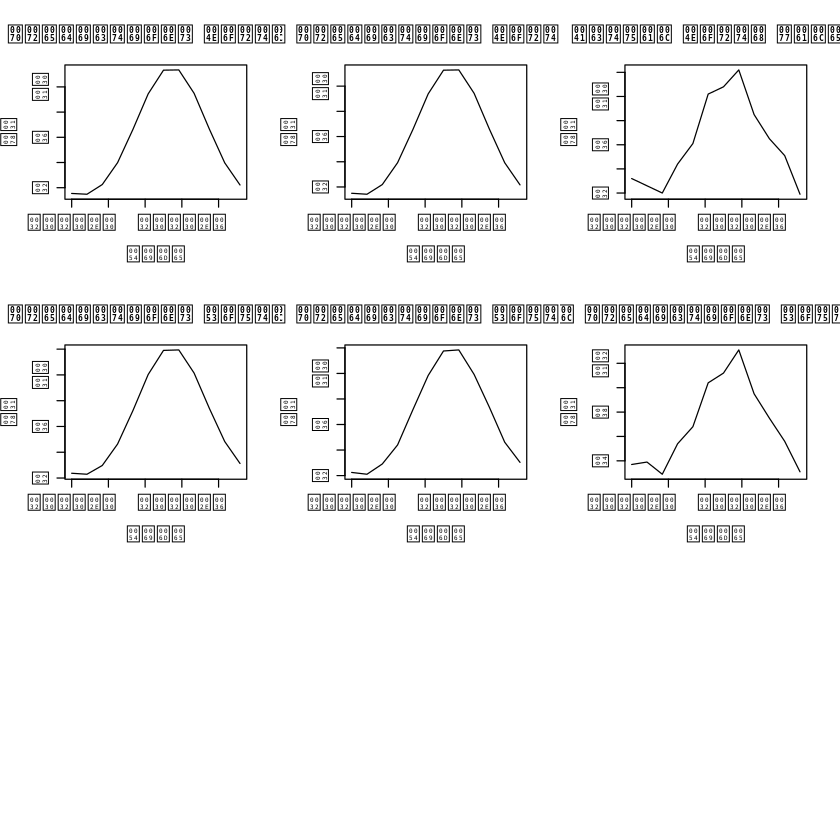

In [164]:
par(mfrow=c(3,3))
plot(test_N_wales,main = "Test predictions North wales")
plot(final_N_wales,main = "Final predictions North wales")
plot(actual_N_wales,main = "Actual North wales")
plot(test_S_wales,main = "Test predictions South wales")
plot(final_S_wales,main = "Final predictions South wales")
plot(actual_S_wales,main = "Actual predictions South wales")
